In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('data/benchmark/avo_benchmark_table_times_10.csv', index_col=0)
display(dataframe)

,i_bench,T,scenario,i_budget,benchmark_eig,mean_wall_time,std_wall_time
0,1,10,dn,1,0.835858,0.003978,0.003047
1,1,15,dn,1,1.159254,0.002672,0.000866
2,1,25,dn,1,1.474077,0.002492,0.000728
3,1,39,dn,1,1.381997,0.002517,0.000523
4,1,63,nmc,1,0.609767,0.002506,0.000570
...,...,...,...,...,...,...,...
3715,10,100000,nmc,4,1.864457,0.112541,0.016825
3716,10,100000,nmc_reuse,4,2.524034,533.912942,44.995441
3717,10,100000,dn,4,2.434651,0.123920,0.014050
3718,10,100000,var_marg,4,2.478678,63.499066,3.296576


In [3]:
n_fwd_sample_list = dataframe['T'].unique()

In [4]:
colour_dict = {'nmc': 'black', 'nmc_reuse': 'grey',
               'dn': 'tab:pink', 'var_marg': 'cyan',
               'var_post': 'orange',
               'nce': 'tab:red'}

marker_dict = {'nmc': '8', 'nmc_reuse': 's',
               'dn': 'p', 'var_marg': 'P',
               'var_post': '*',
               'nce': 'X'}

label_dict = {'nmc': 'NMC', 'nmc_reuse': r'$\mathrm{NMC}_\mathrm{re}$',
              'dn':  r'$D_N$', 'var_marg': 'Var Marg',
              'var_post': 'Var Post',
              'nce': 'infoNCE'}

#
scenarios = ['nmc', 'nmc_reuse', 'dn', 'var_marg', 'var_post', 'nce']
# scenarios = ['nmc', 'nmc_reuse', 'dn', 'var_marg', 'var_post']


In [5]:
i_budget = 2
scenario = 'nmc_reuse'
 
local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
local_df = local_df.reset_index(drop=True)

local_T = local_df['T'].unique()

local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])

display(local_df)

,T,benchmark_eig,mean_wall_time,std_wall_time
0,63,1.213812,0.016478,0.002615
1,100,1.700657,0.023199,0.003404
2,158,0.601240,0.035388,0.005094
3,251,1.453512,0.033990,0.002098
4,398,1.471130,0.062594,0.010128
...,...,...,...,...
165,15848,1.922629,6.461533,0.527162
166,25118,1.939438,14.062794,1.241258
167,39810,1.919155,29.997070,3.218679
168,63095,1.922629,74.412547,7.561654


In [6]:
n_random_benchmarks = 1000
T_benchmark = int(1e5)

random_benchmarks = np.load(f'data/benchmark/avo_benchmark_random_designs_{n_random_benchmarks}_{T_benchmark}.npy', allow_pickle=True)

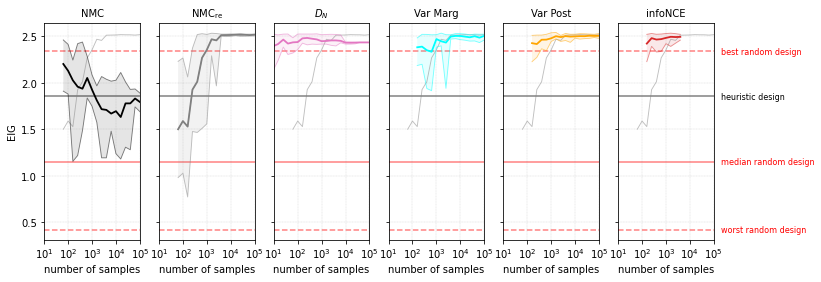

In [7]:
i_budget = 4

fig, ax_dict = plt.subplot_mosaic(
        [[str(scenario) for scenario in scenarios]],
    figsize=(12,4), sharex=False, sharey=True)

s  = 12
lw = 1.8

min_random_benchmark    = np.min(random_benchmarks[i_budget-1, :-1])
max_random_benchmark    = np.max(random_benchmarks[i_budget-1, :-1])
median_random_benchmark = np.median(random_benchmarks[i_budget-1, :-1])
heurist_benchmark       = random_benchmarks[i_budget-1, -1]

local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == 'nmc_reuse')]
local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
local_df = local_df.reset_index(drop=True)
benchmark_T = local_df['T'].unique()
local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])
benchmark_mean = local_results['benchmark_eig']['mean'].to_numpy()
benchmark_min  = local_results['benchmark_eig']['min'].to_numpy()
benchmark_max  = local_results['benchmark_eig']['max'].to_numpy()

for scenario in scenarios:
    
    ax = ax_dict[str(scenario)]
    
    local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
    local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
    local_df = local_df.reset_index(drop=True)

    local_T = local_df['T'].unique()

    local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])
    local_mean = local_results['benchmark_eig']['mean'].to_numpy()
    local_min  = local_results['benchmark_eig']['min'].to_numpy()
    local_max  = local_results['benchmark_eig']['max'].to_numpy()
    local_std  = local_results['benchmark_eig']['std'].to_numpy()

    ax.plot(benchmark_T, benchmark_mean, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='-', alpha=0.5)
    # ax.fill_between(benchmark_T, benchmark_mean, benchmark_min, facecolor=colour_dict['nmc_reuse'], alpha=0.05,)
    # ax.fill_between(benchmark_T, benchmark_mean, benchmark_max, facecolor=colour_dict['nmc_reuse'], alpha=0.05,)
    # ax.plot(benchmark_T, benchmark_min, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='--', alpha=0.2)
    # ax.plot(benchmark_T, benchmark_max, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='--', alpha=0.2)
    
    ax.plot(local_T, local_mean, color=colour_dict[scenario], label=label_dict[scenario], lw=lw)

    ax.plot(local_T, local_min, color=colour_dict[scenario], label=label_dict[scenario], lw=lw*0.5, alpha=0.5)
    ax.plot(local_T, local_max, color=colour_dict[scenario], label=label_dict[scenario], lw=lw*0.5, alpha=0.5)

    # ax.fill_between(local_T, local_mean, local_mean+local_std, facecolor=colour_dict[scenario], alpha=0.2)
    # ax.fill_between(local_T, local_mean, local_mean-local_std, facecolor=colour_dict[scenario], alpha=0.2)
    ax.fill_between(local_T, local_mean, local_min, facecolor=colour_dict[scenario], alpha=0.1)
    ax.fill_between(local_T, local_mean, local_max, facecolor=colour_dict[scenario], alpha=0.1)
    
    ax.set_xlim(1e1, 1e5)
    # ax.set_ylim(2.6, 3.0)
    
    ax.set_xscale('log',base=10)
    ax.set_xlabel('number of samples')

    ax.axhline(heurist_benchmark, color='black', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(max_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(min_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(median_random_benchmark, color='red', linestyle='-', zorder=-5, alpha=0.5, linewidth=1.5)

    # ax.legend(fontsize=10)
    # ax.legend(loc='lower left')
    ax.set_xticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.grid(axis='x', color='gray', linewidth=0.3, alpha=0.5, zorder=-10, linestyle='--')
    ax.grid(axis='y', color='gray', linewidth=0.3, alpha=0.5, zorder=-10, linestyle='--')    
    
    ax.set_title(label_dict[scenario], fontsize=10)
    
ax_dict['nmc'].set_ylabel('EIG')

ax.text(2e5, heurist_benchmark, 'heuristic design', ha='left', va='center', fontsize=8,)
ax.text(2e5, median_random_benchmark, 'median random design', color='red', ha='left', va='center', fontsize=8)
ax.text(2e5, max_random_benchmark, 'best random design', color='red', ha='left', va='center', fontsize=8)
ax.text(2e5, min_random_benchmark,  'worst random design', color='red', ha='left', va='center', fontsize=8)


# fig.savefig(f'figures/avo_benchmark_lines_{i_budget}_eig_separate.pdf', bbox_inches='tight', dpi=150)
# fig.savefig(f'figures/avo_benchmark_lines_{i_budget}_eig_separate.png', bbox_inches='tight', dpi=150)

plt.show()

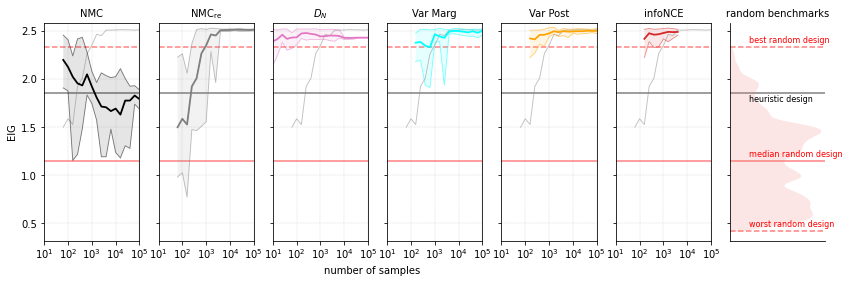

In [22]:
i_budget = 4

fig, ax_dict = plt.subplot_mosaic(
        [[str(scenario) for scenario in scenarios] + ['random_benchmark']],
    figsize=(14,4), sharex=False, sharey=True)

s  = 12
lw = 1.8

min_random_benchmark    = np.min(random_benchmarks[i_budget-1, :-1])
max_random_benchmark    = np.max(random_benchmarks[i_budget-1, :-1])
median_random_benchmark = np.median(random_benchmarks[i_budget-1, :-1])
heurist_benchmark       = random_benchmarks[i_budget-1, -1]

local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == 'nmc_reuse')]
local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
local_df = local_df.reset_index(drop=True)
benchmark_T = local_df['T'].unique()
local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])
benchmark_mean = local_results['benchmark_eig']['mean'].to_numpy()
benchmark_min  = local_results['benchmark_eig']['min'].to_numpy()
benchmark_max  = local_results['benchmark_eig']['max'].to_numpy()

for scenario in scenarios:
    
    ax = ax_dict[str(scenario)]
    
    local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
    local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
    local_df = local_df.reset_index(drop=True)

    local_T = local_df['T'].unique()

    local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])
    local_mean = local_results['benchmark_eig']['mean'].to_numpy()
    local_min  = local_results['benchmark_eig']['min'].to_numpy()
    local_max  = local_results['benchmark_eig']['max'].to_numpy()
    local_std  = local_results['benchmark_eig']['std'].to_numpy()

    ax.plot(benchmark_T, benchmark_mean, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='-', alpha=0.5)
#     ax.fill_between(benchmark_T, benchmark_mean, benchmark_min, facecolor=colour_dict['nmc_reuse'], alpha=0.05,)
#     ax.fill_between(benchmark_T, benchmark_mean, benchmark_max, facecolor=colour_dict['nmc_reuse'], alpha=0.05,)
#     ax.plot(benchmark_T, benchmark_min, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='--', alpha=0.2)
#     ax.plot(benchmark_T, benchmark_max, color=colour_dict['nmc_reuse'], lw=lw*0.5, linestyle='--', alpha=0.2)
    
    ax.plot(local_T, local_mean, color=colour_dict[scenario], label=label_dict[scenario], lw=lw)

    ax.plot(local_T, local_min, color=colour_dict[scenario], label=label_dict[scenario], lw=lw*0.5, alpha=0.5)
    ax.plot(local_T, local_max, color=colour_dict[scenario], label=label_dict[scenario], lw=lw*0.5, alpha=0.5)

    # ax.fill_between(local_T, local_mean, local_mean+local_std, facecolor=colour_dict[scenario], alpha=0.2)
    # ax.fill_between(local_T, local_mean, local_mean-local_std, facecolor=colour_dict[scenario], alpha=0.2)
    ax.fill_between(local_T, local_mean, local_min, facecolor=colour_dict[scenario], alpha=0.1)
    ax.fill_between(local_T, local_mean, local_max, facecolor=colour_dict[scenario], alpha=0.1)
    
    ax.set_xlim(1e1, 1e5)
    
    ax.set_ylim(bottom=min_random_benchmark-0.05*(max_random_benchmark-min_random_benchmark))
    
    ax.set_xscale('log',base=10)
#     ax.set_xlabel('number of samples')
        
    ax.axhline(heurist_benchmark, color='black', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(max_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
    # ax.axhline(min_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
    ax.axhline(median_random_benchmark, color='red', linestyle='-', zorder=-5, alpha=0.5, linewidth=1.5)
    
    # ax.legend(fontsize=10)
    # ax.legend(loc='lower left')
    ax.set_xticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.grid(axis='x', color='gray', linewidth=0.3, alpha=0.5, zorder=-10, linestyle='--')
    ax.grid(axis='y', color='gray', linewidth=0.3, alpha=0.5, zorder=-10, linestyle='--')    
    
    ax.set_title(label_dict[scenario], fontsize=10)
    
ax_dict['nmc'].set_ylabel('EIG')

ax = ax_dict['random_benchmark']

#ste transparent background
ax.patch.set_alpha(0.0)

sns.kdeplot(y=random_benchmarks[i_budget-1, :-1], ax=ax, label='random designs', 
            color='lightcoral', linewidth=0, alpha=0.2, bw_adjust=0.4, cut=0,
            fill=True)

for spine in ['top', 'right',]:
    ax.spines[spine].set_visible(False)
    
ax.axhline(heurist_benchmark, color='black', zorder=-5, alpha=0.5, linewidth=1.5)
ax.axhline(max_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
ax.axhline(min_random_benchmark, color='red', linestyle='--', zorder=-5, alpha=0.5, linewidth=1.5)
ax.axhline(median_random_benchmark, color='red', linestyle='-', zorder=-5, alpha=0.5, linewidth=1.5)

ax.text(0.2, heurist_benchmark-0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        'heuristic design', ha='left', va='center', fontsize=8,)
ax.text(0.2, median_random_benchmark+0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        'median random design', color='red', ha='left', va='center', fontsize=8)
ax.text(0.2, max_random_benchmark+0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        'best random design', color='red', ha='left', va='center', fontsize=8)
ax.text(0.2, min_random_benchmark+0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
        f'worst random design', color='red', ha='left', va='center', fontsize=8)

ax.set_xticks([])
ax.set_xlabel('')
ax.set_title('random benchmarks', fontsize=10)

#xlabel as text 
fig.text(0.45, 0.02, 'number of samples', ha='center', va='center', fontsize=10)

fig.savefig(f'figures/avo_benchmark_eig_{i_budget}_kde.pdf', bbox_inches='tight', dpi=150)
fig.savefig(f'figures/avo_benchmark_eig_{i_budget}_kde.png', bbox_inches='tight', dpi=150)

plt.show()

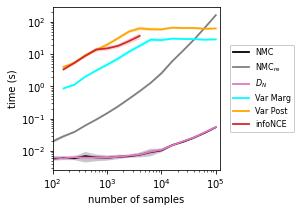

In [41]:
i_budget = 2

fig, ax_dict = plt.subplot_mosaic('a', figsize=(3,3))

s  = 12
lw = 1.8

ax = ax_dict['a']

for scenario in scenarios:
    
    local_df = dataframe[(dataframe['i_budget'] == i_budget) & (dataframe['scenario'] == scenario)]
    local_df = local_df.drop(columns=['i_bench', 'i_budget', 'scenario'])
    local_df = local_df.reset_index(drop=True)

    local_T = local_df['T'].unique()

    local_results = local_df.groupby(by=["T"]).agg(['mean', 'min', 'max', 'std'])

    local_mean = local_results['mean_wall_time']['mean'].to_numpy()
    local_min  = local_results['mean_wall_time']['min'].to_numpy()
    local_max  = local_results['mean_wall_time']['max'].to_numpy()
    local_std  = local_results['mean_wall_time']['std'].to_numpy()

    ax.plot(local_T, local_mean, color=colour_dict[scenario], label=label_dict[scenario], lw=lw)
    ax.fill_between(local_T, local_mean, local_mean+local_std, facecolor=colour_dict[scenario], alpha=0.2)
    ax.fill_between(local_T, local_mean, local_mean-local_std, facecolor=colour_dict[scenario], alpha=0.2)
    
    # ax_dict['a'].plot(scenario_n_samples, scenario_eig, color=colour_dict[scenario],
    #                   lw=2.0, alpha=0.2, zorder=-1,
    #                   marker=None)

    # ax_dict['a'].plot(scenario_n_samples, scenario_eig, color=colour_dict[scenario], label=label_dict[scenario],
    #                   lw=0.0,
                    #   marker=marker_dict[scenario],markerfacecolor='none', markeredgewidth=lw,markersize=s)
    
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)

ax.set_xlim(1e2, 1.2e5)

ax.set_xlabel('number of samples')
ax.set_ylabel('time (s)')

ax.legend(fontsize=10)
# ax.legend(loc='lower left')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=8, frameon=True, facecolor='white', framealpha=1)

fig.savefig(f'figures/avo_benchmark_times_{i_budget}.pdf', bbox_inches='tight', dpi=150)
fig.savefig(f'figures/avo_benchmark_times_{i_budget}.png', bbox_inches='tight', dpi=150)

plt.show()

In [10]:
n_fwd_sample_list

array([    10,     15,     25,     39,     63,    100,    158,    251,
          398,    630,   1000,   1584,   2511,   3981,   6309,  10000,
        15848,  25118,  39810,  63095, 100000])

In [11]:
np.power(n_fwd_sample_list, 1/3)

array([ 2.15443469,  2.46621207,  2.92401774,  3.39121144,  3.97905721,
        4.64158883,  5.40612018,  6.30799355,  7.35576237,  8.57261888,
       10.        , 11.65695337, 13.59196469, 15.84883677, 18.47793815,
       21.5443469 , 25.11837197, 29.28610974, 34.14528373, 39.81056259,
       46.41588834])

100000


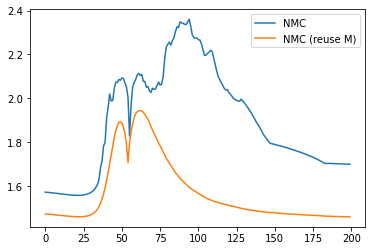

In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

i_benchmark = 5

n_samples = 100000
n_rec = 2

# select closest number of samples
n_samples = n_fwd_sample_list[np.argmin(np.abs(np.array(n_fwd_sample_list) - n_samples))]

print(n_samples)

test_nmc_plain = pickle.load(open(f'../avo/data/benchmark/avo_methods_{i_benchmark}_nmc_{n_samples}.pkl', 'rb'))
test_nmc = pickle.load(open(f'../avo/data/benchmark/avo_methods_{i_benchmark}_nmc_reuse_{100000}.pkl', 'rb'))
test_dn = pickle.load(open(f'../avo/data/benchmark/avo_methods_{i_benchmark}_dn_{n_samples}.pkl', 'rb'))
test_varmarg = pickle.load(open(f'../avo/data/benchmark/avo_methods_{i_benchmark}_var_marg_{n_samples}.pkl', 'rb'))
test_varpost = pickle.load(open(f'../avo/data/benchmark/avo_methods_{i_benchmark}_var_post_{n_samples}.pkl', 'rb'))
try:
    test_nce = pickle.load(open(f'../avo/data/benchmark/avo_methods_{i_benchmark}_nce_{n_samples}.pkl', 'rb'))
except FileNotFoundError:
    test_nce = []

# plt.plot(test_varmarg[1][1]['info'][100]['test_loss'])
# # plt.plot(test_varpost[1][1]['info'][100]['test_loss'])
# plt.show()

plt.plot(test_nmc_plain[1][n_rec]['eig'], label='NMC')

plt.plot(test_nmc[1][n_rec]['eig'], label='NMC (reuse M)')
# plt.plot(test_dn[1][n_rec]['eig'], label='DN')
# plt.plot(test_varmarg[1][n_rec]['eig'], label='var marg')
# plt.plot(test_varpost[1][n_rec]['eig'], label='var post')
# plt.plot(test_nce[1][n_rec]['eig'], label='NCE')
plt.legend()
plt.show()